# Facial Recognition

In [1]:
import numpy as np
import scipy as sp
from scipy import linalg as la
from os import walk
from scipy.ndimage import imread
from matplotlib import pyplot as plt
from random import sample
%matplotlib inline

/Users/matheson/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [16]:
def plot(img, w=200, h=180):
    """Helper function for plotting flattened images."""
    plt.imshow(img.reshape((w,h)), cmap="gray")
    plt.show()

In [17]:
# Problem 1
def getFaces(path="./faces94"):
    """Traverse the directory specified by 'path' and return an array containing one column vector per subdirectory.
    For the faces94 dataset, this gives an array with just one column for each face in the dataset.
    Each column corresponds to a flattened grayscale image.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg":          # only get jpg images
                 # Load the image, convert it to grayscale, and flatten it into vector.
                faces.append(imread(dirpath+"/"+f).mean(axis=2).ravel())
                break
    # Put all face vectors column-wise into a matrix.
    return np.transpose(faces)


(36000, 153)


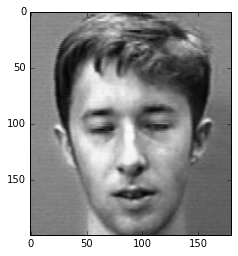

In [60]:
#use plt.imshow()
A = getFaces("./faces94")
#print A
print np.shape(A)
# check that size is 36000 x 153
plot(A[:,36])
#maybe write helper function that accepts flattened image and displays it

In [54]:
class FacialRec:
    """
    Attributes:
        F
        mu
        Fbar
        U
    """
    def __init__(self,path):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.faces = getFaces(path)
        
    def initMeanImage(self):
        #compute mean face and store as self.mu
        self.mu = np.average(self.faces, axis=1)
        
    def initDifferences(self):
        #use array broadcasting
        self.Fbar = self.faces - np.vstack(self.mu)
        
        
        #display one of the mean shifted faces
    def initEigenfaces(self):
        U, E, Vt = sp.linalg.svd(self.Fbar, full_matrices=False)
        #self.eigenfaces = U
        self.U = U
        
    def project(self, A, s=38):
        c = self.U[:, :s]
        #proj
        return np.dot(c.T, A)
    
    def findNearest(self, image, s=38): 
    
        """Project Fbar, producing a matrix whose columns are f-hat"""    
        Fhat = self.project(self.Fbar, s)
        # Fhat =
        """Shift 'image' by the mean and project, producing g-hat"""
        ghat = self.project((np.vstack(image) - np.vstack(self.mu)),s)
         # ghat =
        """For both Fhat and ghat, use your project function from the previous problem.
        Return the index that minimizes ||fhat_i - ghat||_2."""
        
        norm = np.linalg.norm(Fhat - np.vstack(ghat), ord=2, axis=0)
        minimum = np.argmin(norm)
        return self.faces[:, minimum]

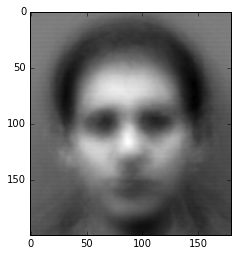

In [55]:
picture = FacialRec(path="./faces94")
plot(picture.mu)
    #the mean face

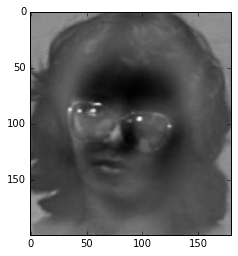

In [56]:
#display one of the mean shifted faces
plot(picture.Fbar[:, 12])

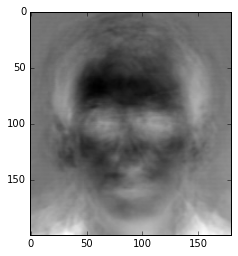

In [57]:
#plot first column of U
plot(picture.U[:,0])

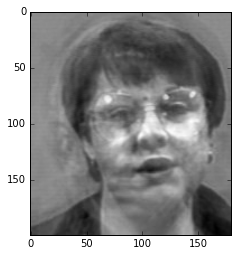

In [58]:
face = picture.Fbar[:, 0]
projection = picture.project(face, s=19)

change = np.dot(picture.U[:,:19], projection)
change += picture.mu

plot(change)

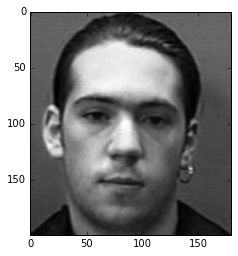

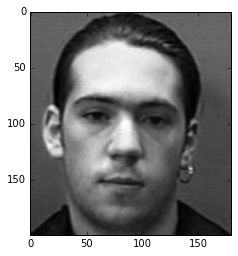

In [59]:
# TESTING
#random_face = sampleFaces(2, path="./faces94")
#plot(random_face)

plot(picture.faces[:, 45])

f = picture.findNearest(picture.faces[:, 45])
plot(f)

In [36]:
def sampleFaces(n_tests, path = "./faces94"):

    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg":  
                files.append(dirpath+"/"+f)
                
    test_files = sample(files, n_tests)
    images = np.array([imread(f).mean(axis=2).ravel() for f in test_files]).T